# Problem Set 2 solutions

## Question 1: Relativity and Particle Decays

### Learning objectives
In this question you will:

- Review relativistic expressions relevant for determining the mass and lifetime of a particle from its decay products
- gain experience in using python to analyze data provided in a text file


### 1a. 

The decays of particles with lifetimes longer than $\sim 0.5$ ps can be observed in high resolution particle detectors. BY measuring many such decays, properties such as the decaying particle's mass and lifetime can be determined.

The file decayData.dat contains a set of simulated observations of particle decays that come from one specific species of hadron, which we designate particle $X$. The $X$ is observed through its decay $ X \rightarrow p \pi^{-} $ where the $p$ is a proton.  All the  $X$ particles are produced at the origin $(x=0,y=0,z-0)$ but they have with a range of momenta.  The position of the decay and the momentum of the proton and $\pi^-$ are measured.


The following code reads this data file and puts the data into a form that can be easily used in python:

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parse the input file.
file = "decayData.dat"

#Each row corresponds to one event. The columns are:
# x-position of the decay vertex in cm
# y-position of the decay vertex in cm
# z-position of the decay vertex in cm
# species of first particle (always a proton)
# p1x: x-momentum of the proton produced in the decay in GeV
# p1y: y-momentum of the proton produced in the decay in GeV
# p1z: z-momentum of the proton produced in the decay in GeV
# species of second particle (always a pi^-)
# p2x: x-momentum of the pi^- produced in the decay in GeV
# p2x: y-momentum of the pi^- produced in the decay in GeV
# p2x: z-momentum of the pi^- produced in the decay in GeV


inMeta = False
vx = []
vy = []
vz = []
p1x = []
p1y = []
p1z = []
p2x = []
p2y = []
p2z = []


inMeta = True
for line in open(file,"r"):
    line = line.strip()
    info = line.split(",")    
    if inMeta and ("<metadata>" in info[0]):
        inMeta = True
    elif inMeta and ("</metadata>" in info[0]):
        inMeta = False
    elif not inMeta:
        vx.append(float(info[0]))
        vy.append(float(info[1]))
        vz.append(float(info[2]))
        p1x.append(float(info[4]))
        p1y.append(float(info[5]))
        p1z.append(float(info[6]))
        p2x.append(float(info[8]))
        p2y.append(float(info[9]))
        p2z.append(float(info[10]))
massPiInGeV = 0.13957
massProtonInGeV = 0.93827

Verify that all these events correspond to the decay of a particle of a specific species by making a histogram of the invariant mass of the decays.

In [ ]:
PUT ANSWER HERE

#### <font color='red'>Solution:</font>

The Average Mass = 1.1156460781296806


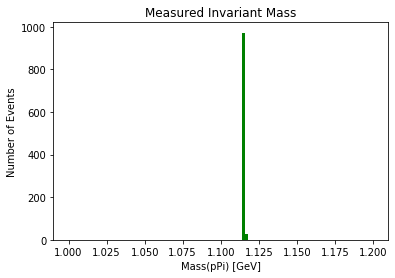

In [17]:
particleMass = []
E1 = []
E2 = []
for i in range(len(p1x)):
    E1.append(math.sqrt(massProtonInGeV**2 + p1x[i]**2 + p1y[i]**2 + p1z[i]**2) )
    E2.append(math.sqrt(massPiInGeV**2 + p2x[i]**2+p2y[i]**2+p2z[i]**2))
    particleMass.append(math.sqrt((E1[i]+E2[i])**2-(p1x[i]+p2x[i])**2-(p1y[i]+p2y[i])**2-(p1z[i]+p2z[i])**2))

theMass = sum(particleMass)/len(particleMass)
print("The Average Mass =", theMass)

import matplotlib.pyplot as plt
plt.hist(particleMass,bins=100,range=(1.00,1.2),facecolor='green')
# Label the x and y axes and add a title
plt.xlabel('Mass(pPi) [GeV]')
plt.ylabel('Number of Events')
plt.title("Measured Invariant Mass")
plt.show()

All the decays have an invariant mass of 1.1155 GeV indicating that they are all consistent with coming from the same species of particle.  From the particle data book, you can deduce that the particle is a $\Lambda^0$

### 1b. 

Using these data, determine the livetime of the $X$ particle.  What evidence do you have that the $X$ has a decay distribution consistent with a single species with one lifetime?

In [ ]:
PUT ANSWER HERE

#### <font color='red'>Solution:</font>

In [44]:
# The data file gives the position of the decay vertex.  We need to turn this into a proper distance
# using the relativistic boost factor gamms
properDistance = []
for i in range(len(p1x)):
    dist = math.sqrt(vx[i]**2+vy[i]**2+vz[i]**2)
    # Relativistic gamma = E/m 
    gamma = (E1[i]+E2[i])/theMass
    properDistance.append(dist/gamma)
    
# If the decay is exponential, the lifetime (here measured as $c\tau$ in units of cm) is just the average of the
# proper distance
ctau = sum(properTime)/len(properTime)
print("Lifetime in cm (ctau) = ",ctau)

Lifetime in cm (ctau) =  7.985848216543455


Note:  This is consistent with the expected lifetime for a $\Lambda^0$

Lifetime in cm (ctau) =  7.985848216543455


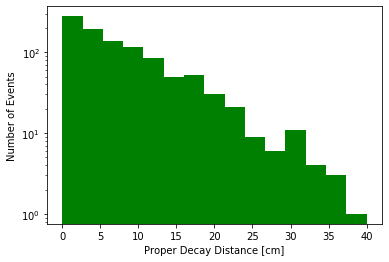

The distribution is a straight line on a log plot, so it is exponential


In [43]:
# There are several ways to demonstrate that the decay is consistent with a single exponential
#
# First method: plot the decay rate using a log scale for the y-axis.  An exponential should look like a straight line
# Make a histogram of the proper distance
plt.hist(properDistance,bins=15,range=(0,40.0),facecolor='green')
plt.yscale('log')
# Label the x and y axes and add a title
plt.xlabel('Proper Decay Distance [cm]')
plt.ylabel('Number of Events')
plt.show()

print("The distribution is a straight line on a log plot, so it is exponential")

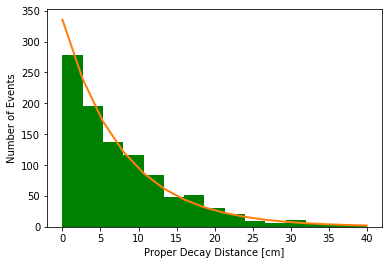

Average proper distance of decays =  7.985848216543455
Fitted lifetime = 7.8916533553760955


In [49]:
# Second method:  Fit the decay distribution to an exponential
# Make a histogram of the proper distance
(entries,bins,patches) = plt.hist(properDistance,bins=15,range=(0,40.0),facecolor='green')
# Label the x and y axes and add a title
plt.xlabel('Proper Decay Distance [cm]')
plt.ylabel('Number of Events')

#
# We now will fit the histogrammed data to an exponential
def expo_model(x,a,b):
    return a*np.exp(-x/b)

# Warning:  The sqrt of N errors only works if the number of entries in the bin is bigger then 10!
bincenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
binErrors = np.array([max(math.sqrt(entries[i]),1.6) for i in range(len(bins)-1)])
from scipy.optimize import curve_fit
popt, pcov = curve_fit(expo_model, xdata=bincenters, ydata=entries, p0=[entries[0],sum(properDistance)/len(properDistance)], sigma=binErrors)

# Add the fit function as a curve
Y = np.zeros(len(bins))
for j in range(len(bins)):
    Y[j] = expo_model(bins[j],popt[0],popt[1])
plt.plot(bins,Y, linewidth=2)
plt.show()
print("Average proper distance of decays = ",sum(properTime)/len(properTime))
print("Fitted lifetime =",popt[1])

The average proper distance is consistent with what we would expect for a $\Lambda^0$ decay.  Also, the fitted liefeime is consistent with what we get from a simple average, indicating that a single exponential is pretty good.
WARNING:  You should NOT use sqrt(N) as the error bar unless N is large.  For this problem, you should really use a binned likelihood fit instead.

---

## Question 2: $\pi^0$ Decay

### Learning objectives
In this question you will:

- Review basic concepts of Special Relativity and Lorentz Boosts
- Apply these concepts to the case of $\pi^0\rightarrow \gamma \gamma$ decay
- Learn techniques needed to simulate the decay of an ensemble of  $\pi^0$s with non-zero momentum


*Adapted from Perkins $4^{th}$ Edition Problem 1.4*

In this problem you will derive an expression for the distribution of photon energies produced in the decays of $\pi^0$s that are moving with fixed momentum.  Then, you will learn how to create a simulated sample of such $\pi^0$ decays.   Note: In this problem, we will use natural units where $\hbar=c=1$.

### 2a. 

A particle beam consists of $\pi^0$'s all with energy $E_{lab}$ and all traveling in the $+z$ direction. Find an expression for the energy of the photons produced from the $\pi^0$ decays as a function of $m_\pi$, $E_{lab}$ and $\theta^*$ (the angle of emission  of the  photon with respect to the $z$-axis in the pion rest frame).  Using this expression, show that the lab energy spectrum of the photons is flat, extending from $E_{lab}\left (1+\beta \right )/2$ to $E_{lab}\left (1-\beta \right )/2$, where $\beta$ is the velocity of the $\pi^0$ in the lab frame.

#### <font color='red'>Solution:</font>

In the rest frame of the $\pi^0$, the two photons are back-to-back and each have energy $E_1 = E_2 = \frac{m_\pi}{2}$.  We can therefore write the momenta of the photons in the $\pi^0$ rest frame as:

\begin{eqnarray*}
\vec p_1 & = & \frac{m_\pi}{2} \left [ \sin\theta^*\cos \phi^* \hat x + \sin\theta^* \sin\phi^* \hat y + \cos\theta^* \hat z   \right ], \\
\vec p_2 & = & - \vec p_1.
\end{eqnarray*}

We now want to boost to the lab frame.  The boost is along the z-direction, so the $x$ and $y$ components of the momentum are not changed by the transform.  The energy and z component are transformed:
\begin{eqnarray*}
E' & = & \gamma \left (E -\beta p_z \right ) \\
p_x' & = & p_x  \\
p_y' & = & p_y \\
p_z' & = & \gamma \left (p_z - \beta E \right ) 
\end{eqnarray*}

Relativity tells us energy of a $\pi^0$ in the beam is $E_{lab}=\gamma m_\pi$.  The energy of the two photons in the lab frame are therefore:

\begin{eqnarray*}
E_1 & = & \frac{E_{lab}}{m_\pi} \left ( \frac{m_\pi}{2} - \beta \frac{m_\pi}{2} \cos \theta^* \right )  = \frac{E_{lab}}{2} \left (1-\beta \cos \theta^* \right )\\
E_2 & = & \frac{E_{lab}}{m_\pi} \left ( \frac{m_\pi}{2} + \beta \frac{m_\pi}{2} \cos \theta^* \right ) = \frac{E_{lab}}{2}\left (1+\beta \cos \theta^* \right )
\end{eqnarray*}

But since the decay of the $\pi^0$ is isotropic in its rest frame, the $\cos\theta^*$ distribution is flat between -1 and 1.  Therefore from the expression above the distribution of the energy of each of the photons is flat and extends from $E_{lab}\left (1+\beta \right )/2$ to $E_{lab}\left (1-\beta \right )/2$.

### 2b. 

Find an expression for the disparity $D$ (the ratio of the energy of the higher energy photon to the energy of the lower energy) and show that in the relativistic limit $\beta\approx 1$, $D>3$ in half the decays and $D>7$ in one quarter

#### <font color='red'>Solution:</font>

Using the expressions for the energy derived above and the definition of $D$ given above:

$$                                                                                                               D = \frac{E_{lab} \left ( 1+\beta \cos \theta^* \right ) } {E_{lab} \left (1-\beta \cos \theta^* \right ) } = \frac{1+\beta \cos \theta^* }{1-\beta \cos \theta^*}                         
$$

where $0 \le \cos\theta^* \le 1$ to ensure that the higher energy photon is in the numerator.

We can find the value of $\cos\theta^*$ that corresponds to a given value $D$ of disparity:

\begin{eqnarray*}
D & = &  \frac{1+\beta \cos \theta^*}{1-\beta \cos \theta^*}\\
D -D\beta\cos\theta^* & = & 1 + \beta \cos\theta^* \\
D-1 & = & \beta\left ( D+1 \right ) \cos \theta^* \\
\cos \theta^* & = & \frac{D-1}{\beta(D+1)}\approx \frac{D-1}{D+1}
\end{eqnarray*}

Thus $D=3$ corresponds to $\cos \theta^* = \frac{2}{4}=\frac{1}{2}$ and $D=7$ corresponds to $\cos\theta^* = \frac{6}{8}=\frac{3}{4}$.   Since $\cos \theta^*$ is distributed uniformly, we can find the fraction of events with $D>3$ is $1-\frac{1}{2}=\frac{1}{2}$ and the fraction of events with $D>7$ is $1-\frac{3}{4} = \frac{1}{4}$ in the relativstic limit.


### 2c. 

It is often useful for physicists to simulate experimental data.  Such simulations allow us generate an ensemble of events corresponding to a given physical process and to study them.  Generated events can be passed through a simulated detector that has imperfections (finite resolution, missing channels, incomplete angular coverage, etc) and the effect of such imperfections on our measurements can be assessed.  This problem is our first example of creating such simulated data.  Our simulation will be quite simple but the concepts developed here will be used through the semester.

Assume we have a beam of 10000 $\pi^0$ all with energy 5 GeV.  Simulate the decay of these pions and plot (histogram) the following distributions:
- The energies of the photons produced in the $\pi^0$ decay
- The disparity of the decays
- The angles $\theta$ between the momenta of the photons and that of the $\pi^0$ in the lab frame.
    
Hints: 
- For each decay, first simulate the decay in the pion center of mass and then Lorentz boost to the lab frame 
- Since in the rest frame of the pion, the decay is isotropic, the distribution of $\cos \theta^*$ is uniformly distributed.  If for each event you pull a random number uniformly distributed between 0 and 1 and set $\cos \theta^* $ for that event equal to the random number, the decays will have the right distribution.
- In principle, you could find the $\phi^*$ angle for each decay by pulling a second uniformly distributed random number, but for this problem you will not need the $x$ and $y$ components of the photon momentum separately so you don't need to do this.

#### <font color='red'>Solution:</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# set pi^0 mass; use GeV for everything (remember h=c=1)
mass = 0.1349770

def piZeroDecay(piEnergy, nevents):
    """Compute the lab-frame energies and angles of pi^0 decay photons. 
    Randomly picks cos(Theta*) for the pi^0 decays and then boosts the 
    photons from the pi^0 rest frame to the lab frame.
    
    Parameters
    ==========
    piEnergy : float
      the energy of the pi^0 in the lab frame in GeV
      
    nevents : int
      number of decays to simulate
      
    Returns
    =======
    Elab1 : array
      1-d array of length nevents representing higher-energy photon lab 
      frame energies
      
    Elab2 : array
      1-d array of length nevents representing lower-energy photon lab 
      frame energies
      
    ThetaLab1 : array
      1-d array of length nevents representing angles (in radians) between 
      higher-energy photon and pi^0 momenta
      
    ThetaLab2 : array
      1-d array of length nevents representing angles (in radians) between 
      lower-energy photon and pi^0 momenta
    """
    
    # Calculate Lorentz variables gamma and beta
    gamma = piEnergy/mass
    beta = (1-gamma**-2)**.5
    
    # Throw random number to pick Cos(Theta*)
    # Note: We only bother to throw 0<cos(Theta*)<1 since it makes it easier to assign which photon is higher energy
    cosThetastar = np.random.rand(nevents)
    # Calculate photon energies in lab frame
    # Note: we have defined things so that photon 1 has the higher energy
    Elab1 = 0.5*piEnergy*(1+beta*cosThetastar)
    Elab2 = 0.5*piEnergy*(1-beta*cosThetastar)
    
    # calculate theta  in the lab frame for each photon.  To do this note that the x and y components of the photon momentum
    # are not affected by the boost.  Define pT=sqrt(px^2+py^2)=mass/2 sin(Theta*)
    pT = 0.5 * mass * np.sin(np.arccos(cosThetastar))
    ThetaLab1 = np.arcsin(pT/Elab1)
    ThetaLab2 = np.arcsin(pT/Elab2)
    
    return Elab1, Elab2, ThetaLab1, ThetaLab2

Text(0.5, 1.0, 'Photon Energy in Lab Frame for 5 GeV $\\pi^0$ Decays')

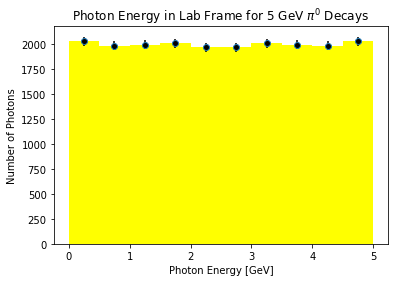

In [2]:
requestedEnergy = 5  # energy in GeV
nevents = 10000        # number of events to simulate

E1, E2, ThetaLab1, ThetaLab2 = piZeroDecay(requestedEnergy, nevents)
gammaEnergy = np.concatenate((E1,E2)) #array of photon energies
disparity = E1/E2

# Fill the histogram.  The hist function returns entries per bin, bin boundaries and
# the objects representing the plotted patches
n, bins, patchs = plt.hist(gammaEnergy,bins=10,range=(0.0,requestedEnergy),facecolor='yellow')

# The code below draws error bars with size sqrt(number of events)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.errorbar(bin_centers,n,xerr=None,yerr=n**0.5,fmt='o',ecolor='black',markerfacecolor='black')

# Label the x and y axes and add a title
plt.xlabel('Photon Energy [GeV]')
plt.ylabel('Number of Photons')
name = "Photon Energy in Lab Frame for "+str(requestedEnergy)+r" GeV $\pi^0$ Decays"
plt.title(name)

Text(0.5, 1.0, 'Disparity for 5 GeV $\\pi^0$ Decays')

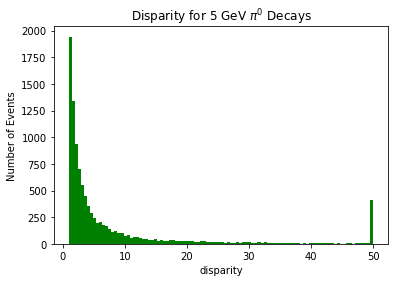

In [3]:
# Fill the histogram.  Note: np.clip() makes the last bin an overflow bin
maxRange=50
plt.hist(np.clip(disparity,1.0,maxRange),bins=100,range=(1.0,maxRange),facecolor='green')
# Label the x and y axes and add a title
plt.xlabel('disparity')
plt.ylabel('Number of Events')
name = "Disparity for "+str(requestedEnergy)+r" GeV $\pi^0$ Decays"
plt.title(name)

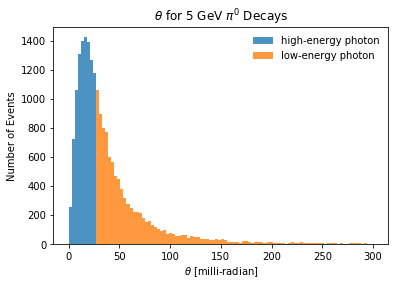

In [4]:
# Fill the histogram.  Note: np.clip() makes the last bin an overflow bin

# Convert radians to milli-radians for easier plotting
plt.hist(ThetaLab1*1e3,bins=100,range=(0,300),alpha=0.8,label="high-energy photon")
plt.hist(ThetaLab2*1e3,bins=100,range=(0,300),alpha=0.8,label="low-energy photon")

# Label the x and y axes and add a title
plt.xlabel(r'$\theta$ [milli-radian]')
plt.ylabel('Number of Events')
name = r"$\theta$ for "+str(requestedEnergy)+r" GeV $\pi^0$ Decays"
plt.title(name)
plt.legend(frameon=False)

### 2d. 

Modify your simulation so that instead of having a fixed energy beam, the $\pi^0$ energy is uniformly distributed between 1 and 20 GeV.  Make a 2D histogram of the opening angle between the two photons (measured in milli-radians) as a function of the $\pi^0$ energy.

#### <font color='red'>Solution:</font>

Text(0.5, 1.0, 'Opening Angle for 1.0 to 20.0 GeV $\\pi^0$ Decays')

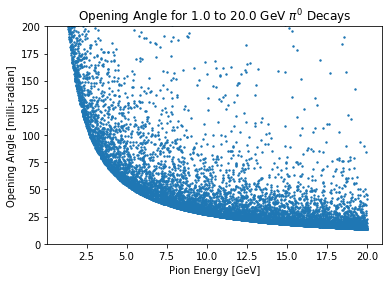

In [5]:
bounds = 1,20 #range of pion energies
# This gives a flat distribution of energy between energy bounds
energies = bounds[0] + (bounds[1]-bounds[0])*np.random.rand(nevents)
E1, E2, ThetaLab1, ThetaLab2 = piZeroDecay(energies,nevents)

#since the photons must have opposite phi, the angle between them is the sum of their thetas
openingAngles = (ThetaLab1+ThetaLab2)*1e3

plt.scatter(energies,openingAngles,s=2) # s controls the size of the points that are draw.                                                               
plt.xlabel('Pion Energy [GeV]')
plt.ylabel('Opening Angle [milli-radian]')
plt.ylim([0,200])
name = r"Opening Angle for %.1f to %.1f GeV $\pi^0$ Decays"%bounds
plt.title(name)

### 2e. 

In the ATLAS detector, photons are identifed in the electromagnetic calorimeter by looking for a narrow energy cluster. Assume that two photons will be *merged* into a single cluster if their opening angles differ by more than 75 milli-radians.  Using your scatter plot above, estimate the maximum energy $\pi^0$ for which the decay photons can be cleanly separated. (Note: the ATLAS detector is more complicated than the description presented in this problem, having different granularities in $\theta$ and $\phi$ directions.  Moreover, the experiment can *identify* $\pi^0$ at higher energies than suggested here by looking at the width of the merged energy deposit from the two clusters.)

#### <font color='red'>Solution:</font>

Looking at the plot above, ATLAS can on cleanly separate photons from pions with energy about 3.5 GeV

## Question 3: Mandelstam Variables

### 3a. 

Show that $s$ is the square of the center-or-mass energy of the system $1+2$

In the center of mass frame $\vec p_1 = - \vec p_2$.  So:
\begin{eqnarray*}
s & \equiv & \left (p_1+p_2 \right )^2 \\
& = & \left ( E_1 +E_2 \right )^2 - \left (\vec p_1 + \vec \_2 \right )^2 \\
& = & \left ( E_1 +E_2 \right )^2
\end{eqnarray*}
Thus, $s$ is the square of the center of mass energy

### 3b. 

Show that $$s+t+u = m_1^2+m_2^2+m_3^2+m_4^2$$

\begin{eqnarray*}
s + t + u & = & 
\left (p_1+p_2 \right )^2 + \left (p_1 - p_3 \right )^2 + \left (p_1-p_4 \right )^2 \\
& = & p_1^2 + p_2^2 + 2 p_1 \cdot p_2 + p_1^2 + p_3^2 - 2 p_1 \cdot p_3 + p_1^2 + p_4^2 - 2 p_1 \cdot p_4 \\
& = & 3 p_1^2 + p_2^2 + p_3^2 + p_4^2 + 2p_1 \cdot \left (p_2-p_3-p_4 \right )\\
& = & 3p_1^2 + p_2^2 + p_3^2 + p_4^2 -2 p_1^2\\
& = & p_1^2 + p_2^2 + p_3^2 + p_4^2 \\
& = & m_1^2 + m_2^2 + m_3^2 + m_4^2
\end{eqnarray*}


## Question 4: $\beta$-decay and the uncertainty principle

\begin{eqnarray*}
\Delta x \Delta p & \ge &  \hbar\\
\Delta p & \ge & \frac{\hbar}{\Delta x} \\
\Delta pc & \ge & \frac{\hbar c } {\Delta x} \\
& \ge & \frac{197 \;\;{\rm MeV\; fm}}{1\;{\rm fm}}\\
& \ge & 197 \;{\rm MeV}
\end{eqnarray*}
The endpoint of the tritium $\beta$-decay spectrum is only about 18 keV, much smaller than the value obtained from the uncertainty principle.  Thus, the electron cannot be bound in the nucleus and must be produced in a decay

## Question 5: Kinematics in 2-body particle decays

\begin{eqnarray*}
m_a^2 & = & E_a^2 - \vec p_a^2 \\
& = & \left ( E_1+E_2 \right ) ^2 - \left ( \vec p_1 + \vec p_2 \right)^2 \\
& = & E_1^2 + E_2^2 + 2 E_1 E_2 - \left ( p_1^2 + p_2^2 + 2 \vec p_1 \cdot \vec p_2\right ) \\
& = & E_1^2 - \vec p_1^2 + E_2^2 - \vec p_2^2 + 2 E_1E_2 \left (1-
\frac{\left |\vec p_1 \right | \left |\vec p_2 \right |}{E_1E_2} \cos \theta \right)\\
& = & E_1^2 - \vec p_1^2 + E_2^2 - \vec p_2^2 + 2 E_1E_2 \left (1-
\beta_1\beta_2 \cos \theta \right)\\
\end{eqnarray*}